# 베르누이 분포

### True/Fase, 성공/실패, Y/N, 앞/뒤

- 이산확률분포
- 확률질량함수 PMF 로 정의


(정의) 1, 0

$\theta$ : "1이 나올 확률" 모수  
변수와 모수는 세미콜론(;)으로 분리

$$
\text{Bern}(x; \theta) = 
\begin{cases}
\theta & \text{if }x = 1, \\
1-\theta & \text{if }x = 0
\end{cases}
$$

(정의) 1, -1로 정의할 때,
$$ \text{Bern}(x; \theta) = \theta^{(1+x)/2} (1-\theta)^{(1-x)/2} $$  


(의미)
확률 변수 X가 베르누이 분포를 따른다
$$ X \sim \text{Bern}(x;\theta) $$

## 베르누이 분포의 모멘트

#### 기대값
$$\text{E}[X]  = \theta$$

(증명)
$$\text{E}[X] = \sum x_i P(x_i) = 1 \cdot \theta + 0 \cdot (1 - \theta) =  \theta$$

In [12]:
# 시뮬레이션의 베르누이 기대값 구하기 (평균)
np.mean(x)

0.62

#### 분산

$$\text{Var}[X] = \theta(1-\theta)$$

(증명)

$$\text{Var}[X] = \sum (x_i - \mu)^2 P(x_i) = (1 - \theta)^2 \cdot \theta + (0 - \theta)^2 \cdot (1 - \theta) = \theta(1-\theta)$$

In [16]:
# 시뮬레이션의 베르누이 분산 구하기
np.var(x, ddof=1)   # ddof=1의 의미는?

0.23797979797979804

In [18]:
# 베르누이 기대값, 분산 둘다 구하기 (describe)
s = sp.stats.describe(x)
s

DescribeResult(nobs=100, minmax=(0, 1), mean=0.62, variance=0.23797979797979804, skewness=-0.4944513860581973, kurtosis=-1.755517826825128)

In [19]:
s[1], s[2], s[3]

((0, 1), 0.62, 0.23797979797979804)

# 베르누이 분포의 모수 추정
모수추정 (parameter estimation) : 데이터에서 모수의 값을 찾아내는 것

베르누이 분포 모수 추정

$$ \hat{\theta} = \dfrac{\sum_{i=1}^N x_i}{N}= \dfrac{N_1}{N} \;\;\dfrac{\text{(1이 나온 횟수)}}{\text{(전체 데이터 수)}}$$ 

# 베르누이 분포의 활용
- 분류 에측 문제의 출력 데이터가 두 개의 값으로 구분되는 카테고리 값인 경우
    - 어느 값이 가능성이 높은지 표현  
    
    
- 입력 데이터가 0, 1 혹은 참,거짓 등 두 개의 값으로 구분되는 경우
    - 두 종류의 값이 나타내는 비율을 표현

예) 스팸메일

스팸메일로 구분되는 키워드 4가지
$$\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}$$

6개의 스팸메일 데이터가 있다.
$$
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 \\
\end{bmatrix} 
$$

각 키워드의 확률  
$X_1 \sim \text{Bern}(x_1; \theta_1)$ : 스팸 메일이 $x_1$ 키워드를 포함하고 있을 확률 $\theta_1 = \dfrac{5}{6}$  

$X_2 \sim \text{Bern}(x_2; \theta_2)$ : 스팸 메일이 $x_2$ 키워드를 포함하고 있을 확률 $\theta_2 = \dfrac{4}{6}$  

$X_3 \sim \text{Bern}(x_3; \theta_3)$ : 스팸 메일이 $x_3$ 키워드를 포함하고 있을 확률 $\theta_3 = \dfrac{3}{6}$  

$X_4 \sim \text{Bern}(x_4; \theta_4)$ : 스팸 메일이 $x_4$ 키워드를 포함하고 있을 확률 $\theta_4 = \dfrac{3}{6}$  


(다른 표현 ex)  
조건부 확률  스팸메일인데, $x_1$이 포함되어 있을 확률  

$$P(X_1 | Spam)$$



표현 방법 $X_1, X_4$가 나오는 스팸일 확률

$$ P(S|(X_1, X^C_2, X^C_3, X_4) $$


### 베르누이 분포 만들기

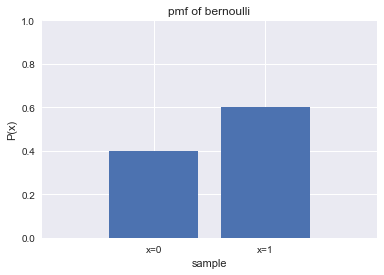

In [3]:
theta = 0.6    # 성공(1)의 확률 정의 ; 모수 정의
rv = sp.stats.bernoulli(theta) # 확률분포 정의

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("sample")
plt.ylabel("P(x)")
plt.title("pmf of bernoulli")
plt.show()

In [4]:
x = rv.rvs(100, random_state=0) # 베르누이 시행 랜덤 변수 추출
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1])

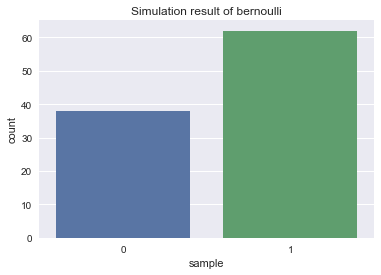

In [6]:
# 시뮬레이션
x = rv.rvs(100, random_state=0) # 베르누이 시행 랜덤 변수 추출
x

sns.countplot(x)
plt.title("Simulation result of bernoulli")
plt.xlabel("sample")
plt.show()

In [8]:
# 이론적 확률 분포(0.6)와 샘플의 확률 분포를 같이 표현
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,simulation,theory
0,0.38,0.4
1,0.62,0.6


In [9]:
df2 = df.stack().reset_index()
df2.columns = ["sample", "type", "ratio"]
df2

,sample,type,ratio
0,0,simulation,0.38
1,0,theory,0.40
2,1,simulation,0.62
3,1,theory,0.60


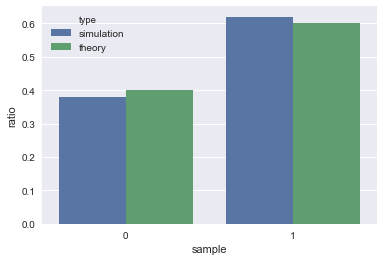

In [10]:
sns.barplot(x="sample", y="ratio", hue="type", data=df2)
plt.show()